In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import seaborn as sns
from src.simulator import BurstGI
from src.experiments import run_experiment
from tqdm import tqdm
import itertools

# plot style
plt.style.use('seaborn-v0_8') 

In [2]:
K = 1_000_000
BurstGI(K, 8, 2, 0.5, burst_scale=1, a_scale=1, b_scale=1).run(True);

System initialized:	Burst(Geom, M)/M/8, 2



Regeneration Cycles: 1000001it [00:55, 18174.69it/s]                            


Wasted jobs:		184204
States Frequencies:	(1000000, 1749460, 1671107, 1442180, 1123590, 800671, 528626, 326601, 188332, 85097, 86273)
Times distribution:	(999518.61, 921676.54, 814882.24, 647048.91, 468446.91, 312394.58, 192912.76, 112012.66, 62759.94, 33668.45, 37884.19)


---
# $v$ of $K$ dependency

In [ ]:
K = 1000
n, m = 3, 2
p = 0.5

burst_img = BurstGI(K, n, m, p, burst_scale=1, a_scale=1, b_scale=2)

total_res = []
total_wasted_jobs_res = []
K_rng = np.arange(1, K, 1)
scales = (2, 1, 1/2, 1/5)
for scale in scales:
	burst_img.a_scale = scale
	res = []
	wasted_jobs_res = []
	for K in tqdm(K_rng):
		burst_img.K = K
		_, v, wasted_jobs, *_ = run_experiment(burst_img, 10)
		res.append(v.argmax())
		wasted_jobs_res.append(wasted_jobs)
	total_res.append(res)
	total_wasted_jobs_res.append(wasted_jobs_res)

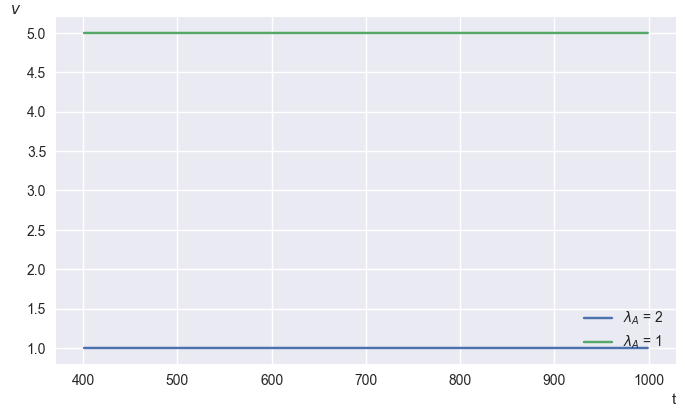

In [4]:
fig, ax = plt.subplots(figsize=(8, 4.5))
records_shift = 400
for r, scale in zip(total_res, scales):
	ax.step(K_rng[records_shift:], r[records_shift:], label=f'$\\lambda_A$ = {scale}')

	ax.set_xlabel('t', loc='right')
	ax.set_ylabel('$v$', loc='top', rotation=0)
	ax.legend(loc='lower right')

---

# CDF

In [ ]:
experiments_number = 300
p = 0.5


exp = {
    'K': (10, 100, 200, 300),
    'n': (0, 1, 3, 5),
    'm': (1, 2, 5),
}

keys, values = zip(*exp.items())

result = {}

burst = BurstGI(1, 1, 1, p, burst_scale=1, a_scale=1, b_scale=2)
for s in tqdm([dict(zip(keys, v)) for v in itertools.product(*values)]):
    burst.K = s['K']
    burst.n = s['n']
    burst.m = s['m']
    total_times, total_v, total_wasted_jobs = [], [], []
    result[(s['K'], s['n'], s['m'])] = [[], [], []]
    for _ in range(experiments_number):
        times, v, wasted_jobs, *_ = run_experiment(burst, 1)
        result[(s['K'], s['n'], s['m'])][0].append(times.sum())
        result[(s['K'], s['n'], s['m'])][1].append(v)
        result[(s['K'], s['n'], s['m'])][2].append(wasted_jobs)
    # result[(s['K'], s['n'], s['m'])] = [r / experiments_number for r in result[(s['K'], s['n'], s['m'])]]

System initialized:	Burst(Geom, M)/M/1, 1



100%|██████████| 36/36 [05:37<00:00,  9.37s/it]


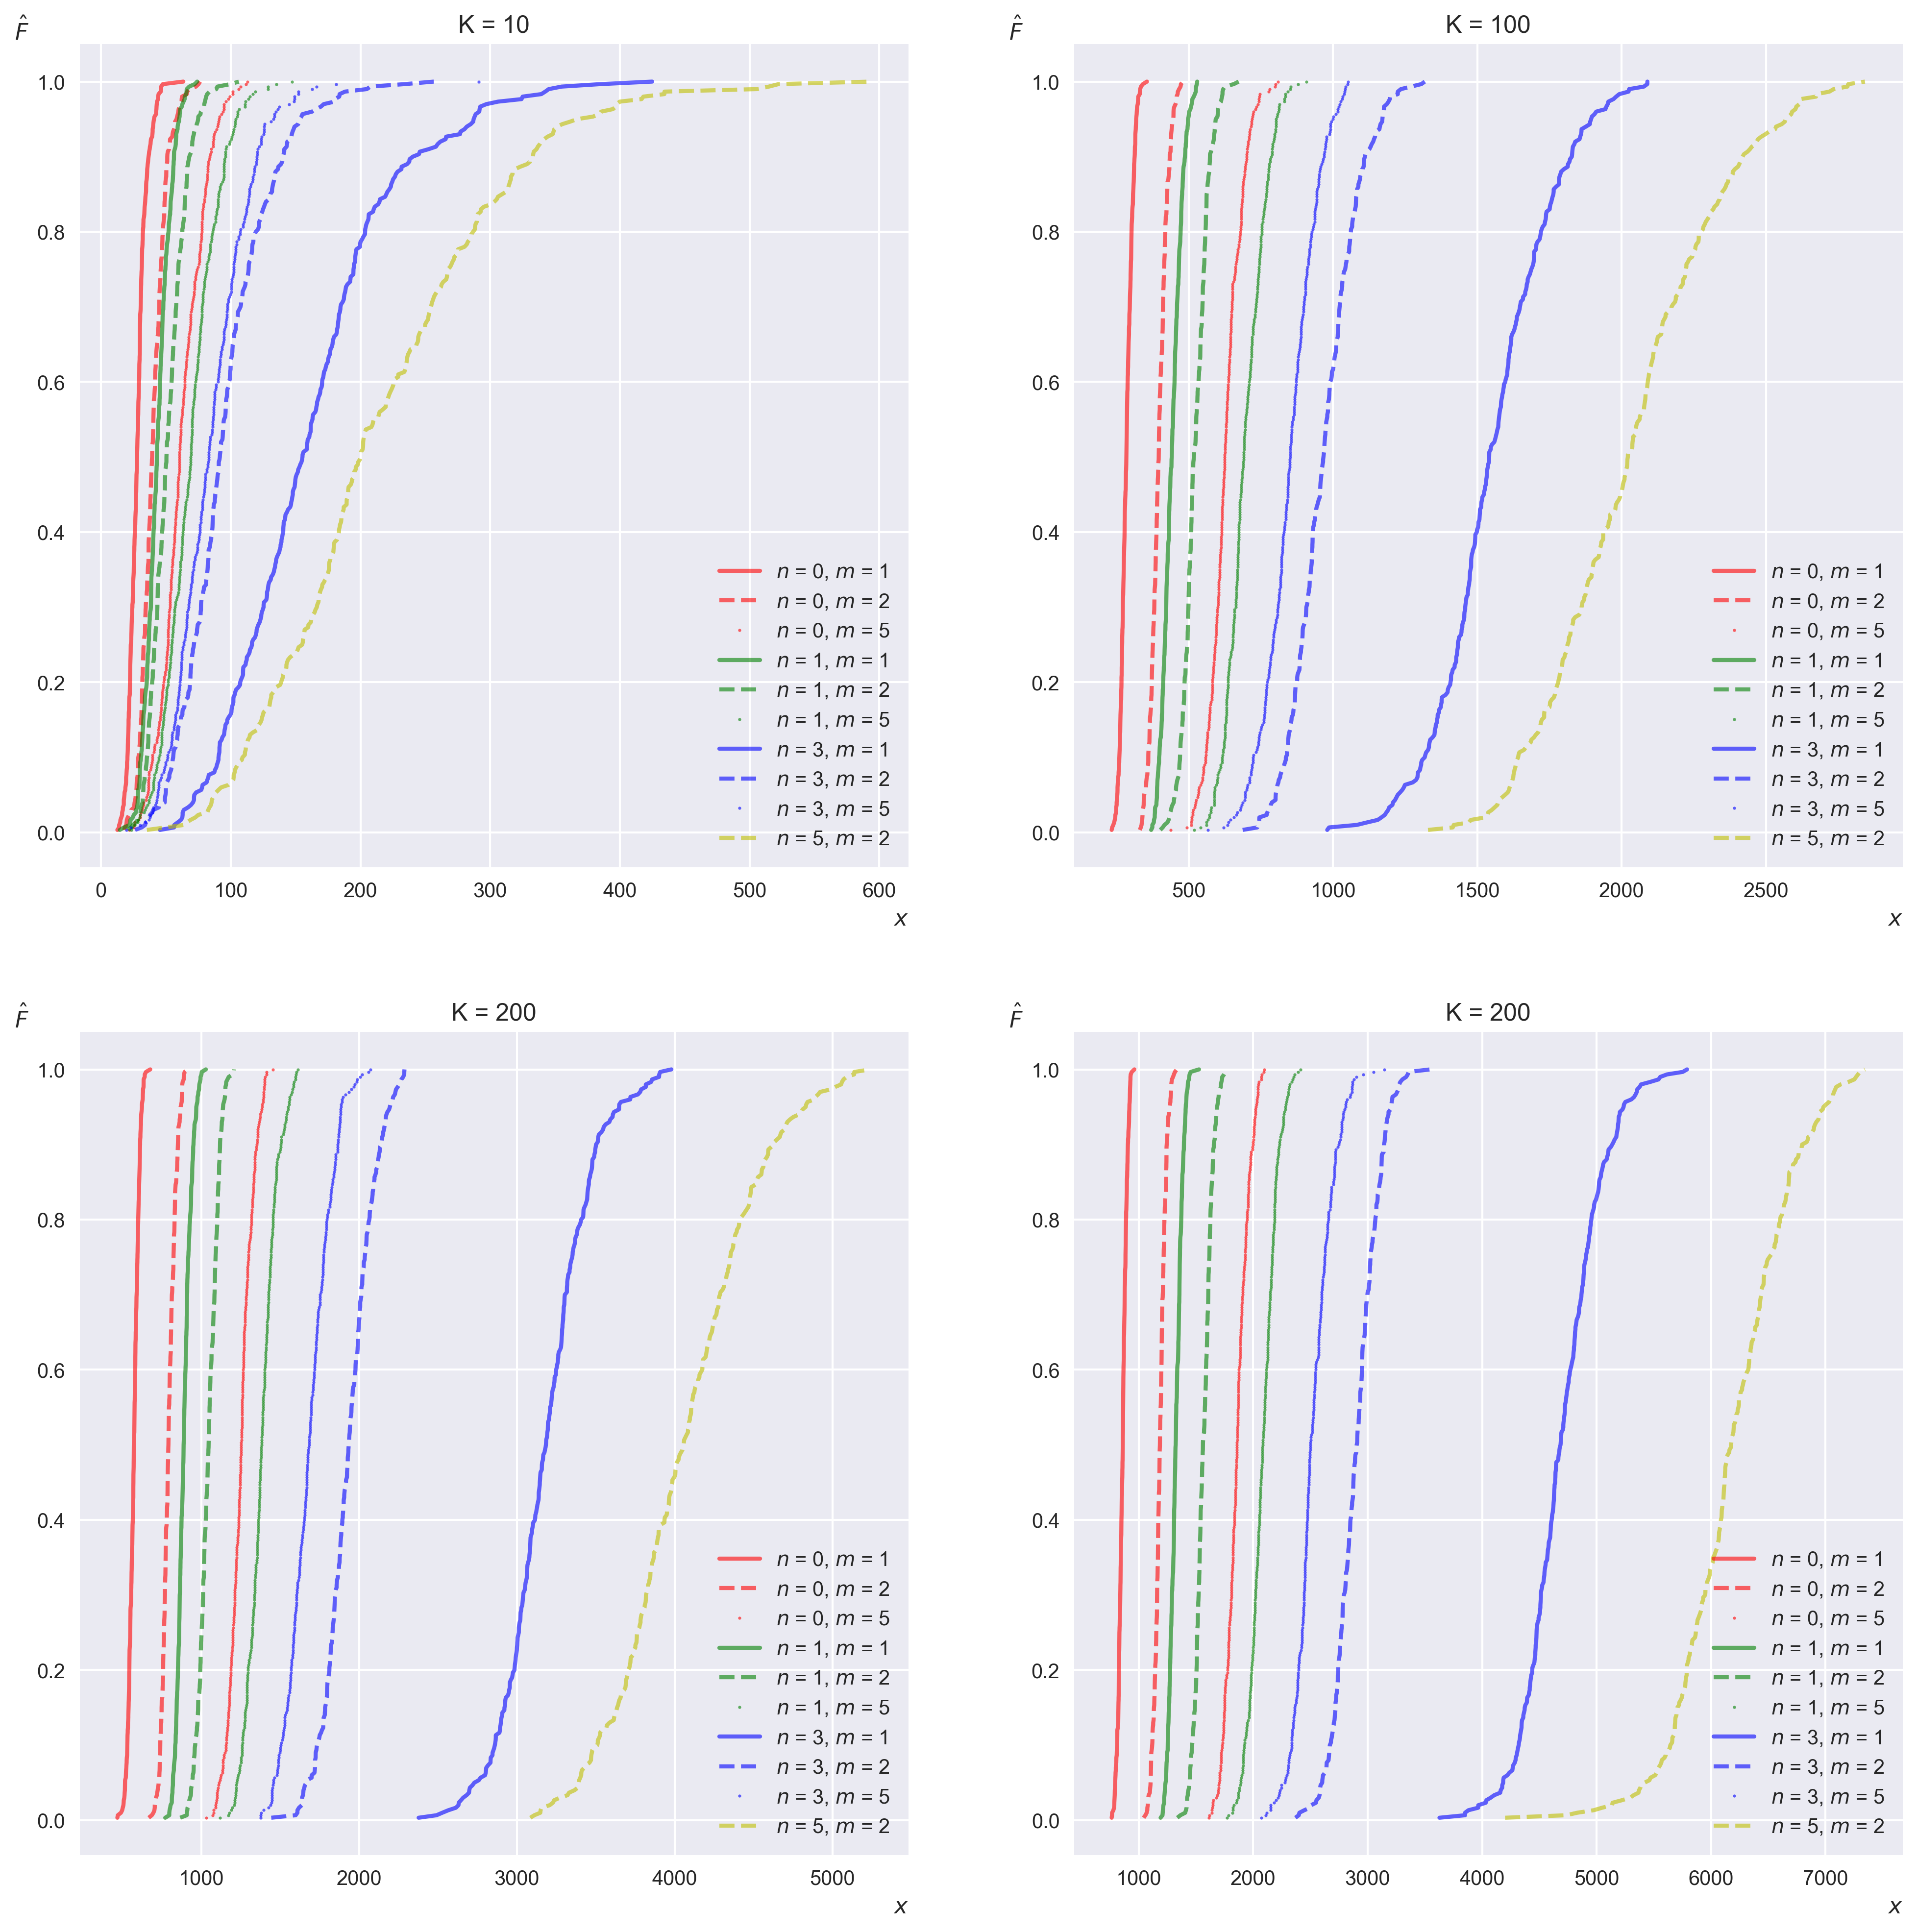

In [13]:
classificator_m = {
	1: '-',
	2: '--',
	5: '.',
}
classificator_n = {
	0: 'r',
	1: 'g',
	3: 'b',
	5: 'y',
}

fix, ax = plt.subplots(2, 2, figsize=[16, 16], dpi=300)

# K = 10
for k, v in {k: v for k, v in result.items() if k[0] == exp['K'][0] and not (k[1] == 5 and k[2] in (5, 1))}.items():
	ax[0][0].plot(
		np.sort(v[0]),
		np.arange(1, (lngth := len(v[0])) + 1) / lngth,
		classificator_n[k[1]] + classificator_m[k[2]],
		# where='post', 
		label=f'$n$ = {k[1]}, $m$ = {k[2]}',
		alpha=0.6,
		linewidth=2,
		markersize=3
	)
ax[0][0].set_xlabel('$x$', loc='right')
ax[0][0].set_ylabel('$\\hat{F}$', loc='top', rotation=0)
ax[0][0].set_title(f'K = {exp['K'][0]}')
ax[0][0].legend()

# K = 100
for k, v in {k: v for k, v in result.items() if k[0] == exp['K'][1]and not (k[1] == 5 and k[2] in (5, 1))}.items():
	ax[0][1].plot(
		np.sort(v[0]),
		np.arange(1, (lngth := len(v[0])) + 1) / lngth,
		classificator_n[k[1]] + classificator_m[k[2]],
		# where='post', 
		label=f'$n$ = {k[1]}, $m$ = {k[2]}',
		alpha=0.6,
		linewidth=2,
		markersize=3
	)
ax[0][1].set_xlabel('$x$', loc='right')
ax[0][1].set_ylabel('$\\hat{F}$', loc='top', rotation=0)
ax[0][1].set_title(f'K = {exp['K'][1]}')
ax[0][1].legend()

# K = 200
for k, v in {k: v for k, v in result.items() if k[0] == exp['K'][2]and not (k[1] == 5 and k[2] in (5, 1))}.items():
	ax[1][0].plot(
		np.sort(v[0]),
		np.arange(1, (lngth := len(v[0])) + 1) / lngth,
		classificator_n[k[1]] + classificator_m[k[2]],
		# where='post', 
		label=f'$n$ = {k[1]}, $m$ = {k[2]}',
		alpha=0.6,
		linewidth=2,
		markersize=3
	)
ax[1][0].set_xlabel('$x$', loc='right')
ax[1][0].set_ylabel('$\\hat{F}$', loc='top', rotation=0)
ax[1][0].set_title(f'K = {exp['K'][2]}')
ax[1][0].legend()

# K = 300
for k, v in {k: v for k, v in result.items() if k[0] == exp['K'][3]and not (k[1] == 5 and k[2] in (5, 1))}.items():
	ax[1][1].plot(
		np.sort(v[0]),
		np.arange(1, (lngth := len(v[0])) + 1) / lngth,
		classificator_n[k[1]] + classificator_m[k[2]],
		# where='post', 
		label=f'$n$ = {k[1]}, $m$ = {k[2]}',
		alpha=0.6,
		linewidth=2,
		markersize=3
	)
ax[1][1].set_xlabel('$x$', loc='right')
ax[1][1].set_ylabel('$\\hat{F}$', loc='top', rotation=0)
ax[1][1].set_title(f'K = {exp['K'][2]}')
ax[1][1].legend()

Text(0, 1, '$\\log_{10} \\overline{R_k}$')

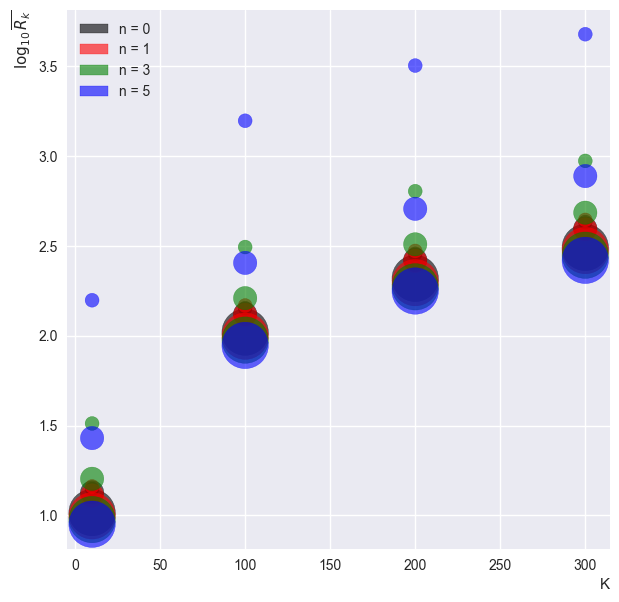

In [ ]:
classificator_m = {
    0: 'black',
    1: 'red',
    3: 'green',
    5: 'blue',
}

mean_times = {k: np.mean([x / (k[1] + k[2] + 1) for x in v[0]]) for k, v in result.items()}

fig, ax = plt.subplots(figsize=(7, 7))

scatter = ax.scatter(
    [k[0] for k in mean_times.keys()],
    [np.log10(v) for v in mean_times.values()],
    c=[classificator_m[k[1]] for k in mean_times.keys()],  # n
    s=[k[2]**1.5 * 100 for k in mean_times.keys()],  # m
    alpha=0.6,
)

black_patch = mpatches.Patch(color='black', label='n = 0', alpha=0.6)
red_patch = mpatches.Patch(color='red', label='n = 1', alpha=0.6)
green_patch = mpatches.Patch(color='green', label='n = 3', alpha=0.6)
blue_patch = mpatches.Patch(color='blue', label='n = 5', alpha=0.6)
ax.legend(handles=[black_patch, red_patch, green_patch, blue_patch])
# ax.legend(scatter.legend_elements(), ['a', 'b', 'c'])

ax.set_xlabel('K', loc='right')
ax.set_ylabel('$\\log_{10} \\overline{R_k}$', loc='top')
